## Tasks for Students:     
1. Perceptron Implementation:         
o Train a Perceptron using the dataset provided.         
o Visualize the decision boundary    . 
2. XOR Proble        m: 
o Use a neural network with one hidden layer to solve X        OR. 
o Visualize the decision boundary using a mesh g    rid. 
3. Visualizat        ions: 
o Plot decision boundaries for both Perceptron and XOR tasks. 

## Code Template: 
# Perceptron Implementation 
def perceptron(X, y, learning_rate, epochs): 
""" 
Train a Perceptron model. 
""" 
pass 
def plot_perceptron_boundary(X, y, weights, bias): 
""" 
Visualize the decision boundary for the Perceptron. 
""" 
pass 
# XOR Neural Network Implementation 
def train_xor_nn(X, y): 
""" 
Train a neural network to solve the XOR problem. 
""" 
pass 
def visualize_xor_boundary(model, X, y): 
""" 
Visualize the decision boundary for the XOR problem. 
""" 
pass

Epoch 0: Loss = 0.7965
Epoch 100: Loss = 0.7372
Epoch 200: Loss = 1.0165
Epoch 300: Loss = 1.3031
Epoch 400: Loss = 1.5276
Epoch 500: Loss = 1.7112
Epoch 600: Loss = 1.8686
Epoch 700: Loss = 2.0080
Epoch 800: Loss = 2.1339
Epoch 900: Loss = 2.2493


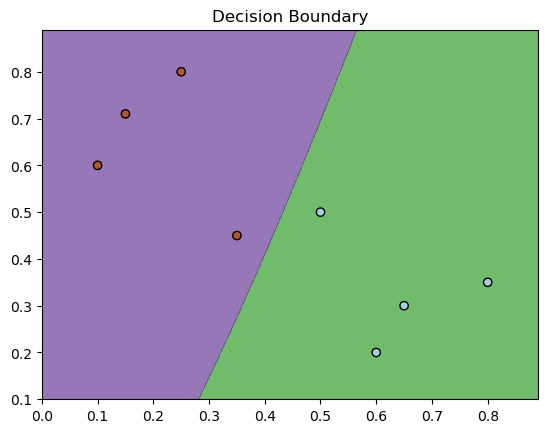

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0.1, 0.6],
              [0.15, 0.71],
              [0.25, 0.8],
              [0.35, 0.45],
              [0.5, 0.5],
              [0.6, 0.2],
              [0.65, 0.3],
              [0.8, 0.35]])
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])

def initialize_parameters(input_size, hidden_size, output_size):
    weights = {
        "W1": np.random.randn(input_size, hidden_size),
        "b1": np.zeros((1, hidden_size)),
        "W2": np.random.randn(hidden_size, output_size),
        "b2": np.zeros((1, output_size))
    }
    return weights

def forward_propagation(X, weights):
    Z1 = np.dot(X, weights["W1"]) + weights["b1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, weights["W2"]) + weights["b2"]
    A2 = 1 / (1 + np.exp(-Z2))  # Sigmoid activation
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def backward_propagation(X, y, weights, cache):
    m = X.shape[0]
    A1, A2 = cache["A1"], cache["A2"]
    dZ2 = A2 - y.reshape(-1, 1)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, weights["W2"].T) * (1 - np.power(A1, 2))
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

def update_parameters(weights, gradients, learning_rate):
    for key in weights:
        weights[key] -= learning_rate * gradients["d" + key]
    return weights

def train_network(X, y, hidden_size, learning_rate, epochs):
    input_size = X.shape[1]
    output_size = 1
    weights = initialize_parameters(input_size, hidden_size, output_size)
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X, weights)
        loss = compute_loss(y, y_pred)
        gradients = backward_propagation(X, y, weights, cache)
        weights = update_parameters(weights, gradients, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
    return weights

def plot_decision_boundary(X, y, weights):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z, _ = forward_propagation(np.c_[xx.ravel(), yy.ravel()], weights)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.7, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title("Decision Boundary")
    plt.show()

hidden_size = 4
learning_rate = 0.1
epochs = 1000

trained_weights = train_network(X, y, hidden_size, learning_rate, epochs)
plot_decision_boundary(X, y, trained_weights)